In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as text
from matplotlib.ticker import FormatStrFormatter

## Linear regression

In this notebook we will consider a simple linear regression model: 

$$ y_i = x_{ij} w_j + b$$

We will be using the "sumation conventions": when an index is repeated the sumation over this index is implied:

$$ 
x_{ij} w_j \equiv   \sum_j x_{ij} w_j 
$$

#### Problem 1

Implement function `linear(x,w,b)` that given feature matrix $\mathbf{x}$, weights $\mathbf{w}$ and bias $b$  returns $\mathbf{y}$. **Hint** Use matrix multiplication operator `@`.  

In [2]:
def linear(x, w, b):
    return np.dot(w, x.T) + b

### Data

#### Problem 2

Generate a random feature matrix $\mathbf{x}$ witch 10000 samples and three features,  
such that first feature is drawn from N(0,1), second feature from  U(,1) and third from N(1,2).

$N(\mu,\sigma)$ denotes normal distribution with mean $\mu$ and standard deviation $\sigma$. To generate random numbers you can use `numpy.random.normal` and `numpy.random.uniform` functions. To collect all features together you can use `numpy.stack` function. 

In [3]:
x = np.stack((np.random.normal(0, 1, 10000),
              np.random.uniform(0, 1, 10000),
              np.random.normal(1, 2, 10000))).T

print(x)

[[ 0.56168113  0.18733783 -2.08107712]
 [ 0.10503917  0.21598683  2.1916687 ]
 [-2.85582166  0.41550995 -0.37886192]
 ...
 [-0.52066269  0.66865579  4.46162156]
 [-0.33899408  0.23637774 -1.58425145]
 [ 0.33556003  0.95785246  2.29995323]]


Then using $\mathbf{x}$, weights $w_{true}$  and  bias $b_{true}$:  

In [4]:
w_true = np.array([0.2, 0.5,-0.2])
b_true = -1

generate output $\mathbf{y}$ assuming a normaly distributed $N(0,0.1)$ noise $\mathbf{\epsilon}$. 

$$ y_i =  
x_{ij} w_j+b +\epsilon_i 
$$

In [5]:
noise = np.random.normal(0, 0.1, 10000)
y = linear(x, w_true, b_true) + noise
print(y)

[-0.47622551 -1.37653177 -1.15179035 ... -1.76612498 -0.72255732
 -0.86096194]


### Loss

#### Problem 3

Given the means square loss

$$ MSE(w,b|y,x) = \frac{1}{2}\frac{1}{N}\sum_{i=0}^{N-1} (y_i -  x_{ij} w_j -b  )^2$$

write down the python function `mse(y,x,w,b)` implementing it:

In [6]:
def mse(y, x, w, b):
    return np.sum((y - linear(w, x, b))**2) / (2*len(y))

### Gradient

Find the gradient of the loss function with respect to weights $w$ and bias $b$. 

#### Bonus problem 

Solve numerically the equations 

$$\frac{\partial}{\partial w_k} MSE(w,b|y,x) = 0,\quad \frac{\partial}{\partial b} MSE(w,b|y,x) = 0$$

for $w_k$ and $b$.  You can use the `numpy.linalg.solve` to solve the linear equation. 

In [7]:
x_bar = x.mean(0)
y_bar = y.mean()
X = np.transpose(x) @ x / len(x)
Y = y @ x /len(y)
A = X - np.multiply.outer(x_bar, x_bar)
w = np.linalg.solve(A,Y-y_bar*x_bar)
b = y_bar - x_bar@w
print(w,b)

[ 0.19897966  0.49950004 -0.20033852] -1.001051806781033


#### Problem 4

Implement functions `grad_w(y,x,w,b)` and `grad_b(y,x,w,b)` implementing those gradients.  

In [8]:
def grad_w(y, x, w, b):
    return np.array([np.sum((linear(x, w, b) - y)*x.T[i]) / len(y) for i in range(len(w))])

In [9]:
def grad_b(y, x, w, b):
    return np.sum(((linear(x, w, b)) - y)) / len(y)

### Gradient descent 

#### Problem 5

Implement gradient descent for linear regression. Starting from 

In [10]:
w = np.asarray([0.0,0.0,0.0], dtype='float64')
b = 1.0

In [11]:
mse(y, x, w, b)

2.00872111208394

In [12]:
learning_rate = 0.1
iterations = 1000
errors = []

for i in range(iterations):
    g_w = grad_w(y, x, w, b)
    g_b = grad_b(y, x, w, b)
    
    w = w - learning_rate*g_w
    b = b - learning_rate*g_b
    errors.append(mse(y, x, w, b))
    
    if i % 100 == 0:
        print()
        print(f'Iteration {i}')
        print(f'Error = {errors[i]}')


Iteration 0
Error = 1.0718790563065617

Iteration 100
Error = 0.021898909354962564

Iteration 200
Error = 0.009473706546055905

Iteration 300
Error = 0.006164553256500649

Iteration 400
Error = 0.005283239942256098

Iteration 500
Error = 0.005048523357709753

Iteration 600
Error = 0.004986012245973826

Iteration 700
Error = 0.004969363916253052

Iteration 800
Error = 0.00496493003442317

Iteration 900
Error = 0.004963749176738881


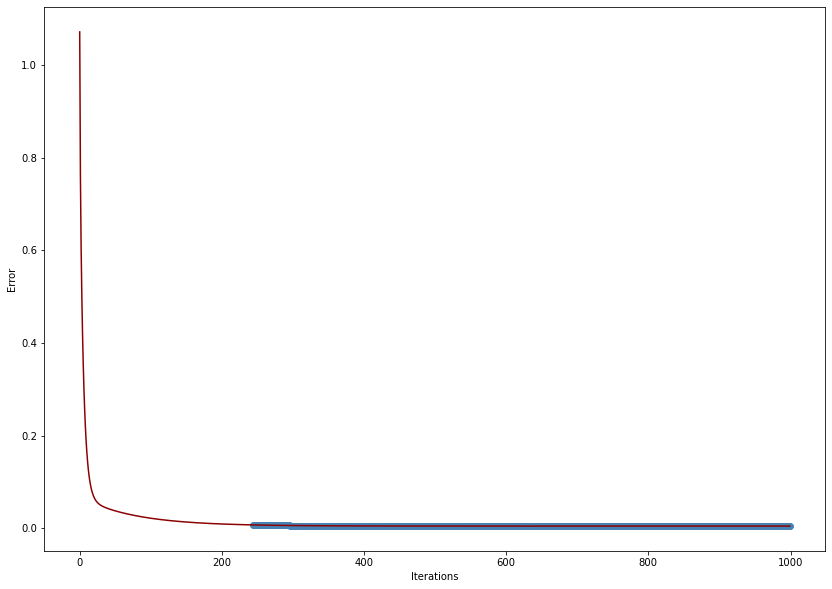

In [13]:
plt.figure(figsize=(14, 10))
plt.xlabel('Iterations')
plt.ylabel('Error')

for i, error in enumerate(errors):
    if error <= 0.0075:
        plt.scatter(i, error, color='steelblue')
        
plt.plot(range(iterations), errors, color='darkred')
plt.show()

How many epochs did you need to get MSE below 0.0075 ? 

#### Problem 6

Implement stochastic gradient descent (SGD).

In [14]:
w = np.asarray([0.0,0.0,0.0], dtype='float64')
b = 1.0 

Starting from same parameters as above and 

In [15]:
batch_size = 100

In [16]:
learning_rate = 0.1
iterations = 1000
errors = []

for n in range(iterations):
    random_indices = np.random.randint(0, len(y), batch_size)
    x_batch = np.array([x[i] for i in random_indices])
    y_batch = np.array([y[i] for i in random_indices])
    
    g_w = grad_w(y, x, w, b)
    g_b = grad_b(y, x, w, b)
    
    w = w - learning_rate*g_w
    b = b - learning_rate*g_b
    errors.append(mse(y, x, w, b))
    
    if n % 100 == 0:
        print()
        print(f'Iteration {n}')
        print(f'Error = {errors[n]}')


Iteration 0
Error = 1.0718790563065617

Iteration 100
Error = 0.021898909354962564

Iteration 200
Error = 0.009473706546055905

Iteration 300
Error = 0.006164553256500649

Iteration 400
Error = 0.005283239942256098

Iteration 500
Error = 0.005048523357709753

Iteration 600
Error = 0.004986012245973826

Iteration 700
Error = 0.004969363916253052

Iteration 800
Error = 0.00496493003442317

Iteration 900
Error = 0.004963749176738881


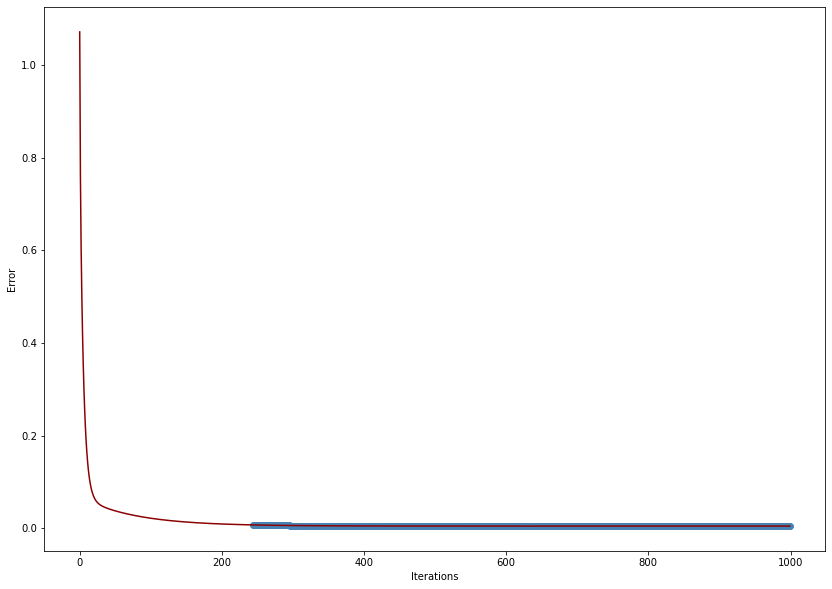

In [17]:
plt.figure(figsize=(14, 10))
plt.xlabel('Iterations')
plt.ylabel('Error')

for i, error in enumerate(errors):
    if error <= 0.0075:
        plt.scatter(i, error, color='steelblue')
        
plt.plot(range(iterations), errors, color='darkred')
plt.show()

how many epochs did you need to get MSE below 0.0075 ?  

### Pytorch 

#### Problem 7

Implement SGD using pytorch. Start by just rewritting Problem 3 to use torch Tensors instead of numpy arrays. 

To convert frrom numpy arrays to torch tensors you can use ``torch.from_numpy()`` function: 

In [18]:
import torch as t 
from torch.autograd import Variable

In [19]:
t_y = Variable(t.from_numpy(y), requires_grad=True)
t_x = Variable(t.from_numpy(x), requires_grad=True)
t_w = Variable(t.DoubleTensor([[0,0,0]]), requires_grad=True)
t_b = Variable(t.DoubleTensor([1.0]), requires_grad=True)

In [20]:
def linear(x, w, b):
    return w.mm(t.transpose(x, 0, 1)) + b

In [21]:
linear(t_x, t_w, t_b)

tensor([[1., 1., 1.,  ..., 1., 1., 1.]], dtype=torch.float64,
       grad_fn=<AddBackward0>)

In [22]:
def mse(y, x, w, b):
    return t.sum(t.square(y - linear(w, x, b))) / (2*len(y))

In [23]:
mse(t_y, t_x, t_w, t_b)

tensor(20087.2111, dtype=torch.float64, grad_fn=<DivBackward0>)

#### Problem 8 

Implement SGD using pytorch automatic differentiation.

To this end the variable with respect to which the gradient will be calculated, ``t_w`` in this case, must have attribute
``requires_grad`` set to ``True`` (``t_w.require_grad=True``).

The torch will automatically track any expression containing ``t_w`` and store its computational graph. The method ``backward()`` can be run on the final expression to back propagate the gradient e.g. ``loss.backward()``. Then the gradient is accesible as ``t_w.grad``.

In [24]:
t_y = t.from_numpy(y)
t_x = t.from_numpy(x)
t_w = t.DoubleTensor([0,0,0])
t_b = t.DoubleTensor([1.0])
t_w.requires_grad_(True)
t_b.requires_grad_(True)

tensor([1.], dtype=torch.float64, requires_grad=True)

#### Problem 9 

Implement SGD using pytorch  optimisers. 

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

t_y = Variable(t.from_numpy(y), requires_grad=True)
t_x = Variable(t.from_numpy(x), requires_grad=True)
t_w = Variable(t.DoubleTensor([0,0,0]), requires_grad=True)
t_b = Variable(t.DoubleTensor([1.0]), requires_grad=True)

In [29]:
model = nn.Linear(3, 1)
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

In [33]:
iterations = 10

for _ in range(0, iterations):
    optimizer.zero_grad()
    predictions = model(t_x.float())
    loss = loss_fn(predictions, t_y.float())
    loss.backward()
    optimizer.step()